1. Image Visualization & Processing
2. Making The Neural Network
3. Training
4. Testing

--------------------------------
# 1. Image Visualization & Processing

In [1]:
# Importing neccessary packages.

import os
import time
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ignore the warning.
import warnings
warnings.filterwarnings('ignore')
#------------------------------------------
notebook_start_time = time.time()

In [2]:
# Setting up image data generators for training and validation.
# The generators apply a rescale transformation to the images and fill any gaps using the 'reflect' method.
img_train_path = os.path.join("C:\\Users\\lavi\\Desktop\\DL1\\DATASET\\TRAIN")
img_test_path = os.path.join("C:\\Users\\lavi\\Desktop\\DL1\\DATASET\\TEST")
data_gen = ImageDataGenerator(rescale=1./255, fill_mode='reflect')
val_gen = ImageDataGenerator(rescale=1./255)

train_gen = data_gen.flow_from_directory(img_train_path, target_size=(256,256), batch_size=128)
validation_gen = val_gen.flow_from_directory(img_test_path, target_size=(256,256), batch_size=128)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
print("Train/Validation indicies: ", train_gen.class_indices)
print("\n Stands for Organic \"O\", and 1 stands for Non-Organic \"R\"")

Train/Validation indicies:  {'O': 0, 'R': 1}

0 Stands for Organic "O", and 1 stands for Non-Organic "R"


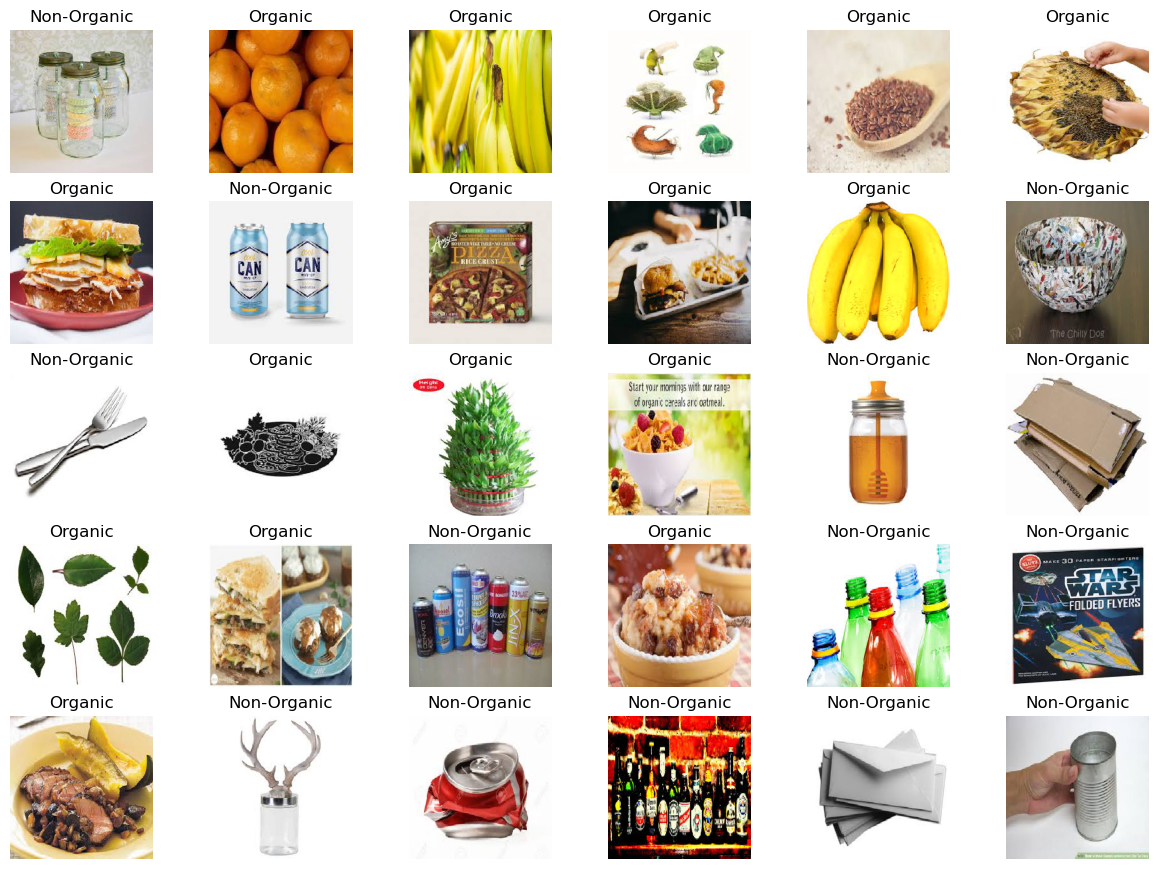

In [4]:
# Plotting images from the train set.

img, _= next(train_gen)
plt.figure(figsize=(15, 13))
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    if _[i][1] == 0:
        plt.title("Organic")
    else:
        plt.title("Non-Organic")
    plt.axis("off")
del img
del _ 

# 2. Making The Neural Network

In [5]:
model = tf.keras.Sequential()

# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add fully-connected layers with weight decay
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(optimizer='Nadam',loss='CategoricalCrossentropy', metrics=['accuracy'])

In [7]:
# Setting up early stopping and model checkpointing to ensure we save the best model during training
# The early stopping monitor will stop training if the validation loss does not improve after 5 epochs
# The model checkpoint will save the best model based on the validation loss, and restore the best weights if training is stopped early

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', save_best_only=True)

# 3. Training

In [8]:
# Compiling the model using the Nadam optimizer, categorical cross-entropy loss, and accuracy metric

history = model.fit(train_gen, validation_data=validation_gen, epochs=10, callbacks=[best_model, early_stopping_monitor])

Epoch 1/10
177/177 [==============================] - 2632s 14s/step - loss: 0.5965 - accuracy: 0.7875 - val_loss: 0.3713 - val_accuracy: 0.8838
Epoch 2/10
177/177 [==============================] - 2111s 12s/step - loss: 0.4140 - accuracy: 0.8417 - val_loss: 0.3484 - val_accuracy: 0.8886
Epoch 3/10
177/177 [==============================] - 2090s 12s/step - loss: 0.3635 - accuracy: 0.8641 - val_loss: 0.2755 - val_accuracy: 0.9025
Epoch 4/10
177/177 [==============================] - 2169s 12s/step - loss: 0.3407 - accuracy: 0.8707 - val_loss: 0.2960 - val_accuracy: 0.8874
Epoch 5/10
177/177 [==============================] - 2987s 17s/step - loss: 0.3195 - accuracy: 0.8795 - val_loss: 0.2720 - val_accuracy: 0.9009
Epoch 6/10
177/177 [==============================] - 2614s 15s/step - loss: 0.3033 - accuracy: 0.8876 - val_loss: 0.2907 - val_accuracy: 0.8886
Epoch 7/10
177/177 [==============================] - 3586s 20s/step - loss: 0.2923 - accuracy: 0.8928 - val_loss: 0.2708 - val_ac

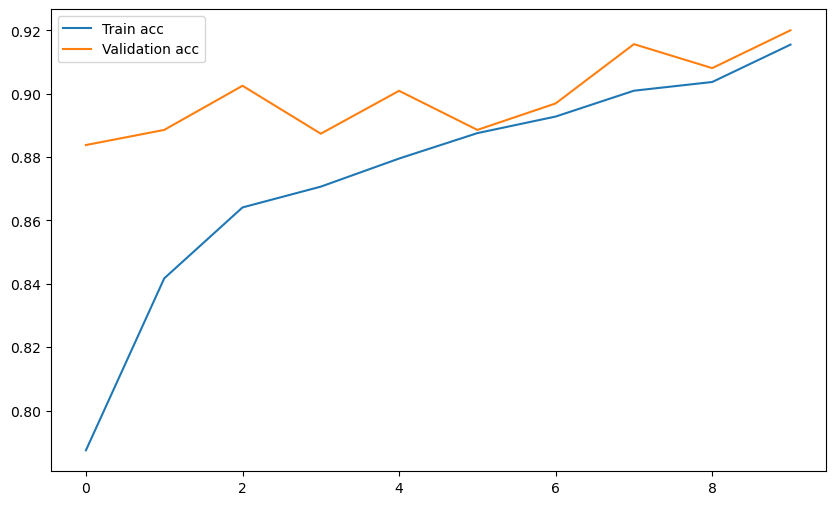

In [9]:
# Plotting the training and validation accuracy over the epochs
# The figure size is set to [10,6] and the accuracy is plotted for both the training and validation sets
# A legend is added to the plot to distinguish between the two sets, and the plot is then displayed using plt.show()

plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

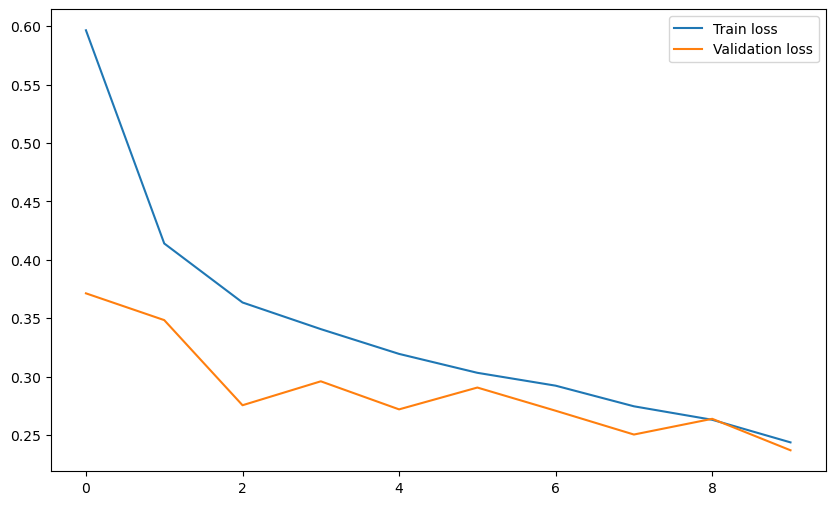

In [10]:
# Plotting the training and validation loss over the epochs
# The figure size is set to (10,6) and the loss is plotted for both the training and validation sets
# A legend is added to the plot to distinguish between the two sets, and the plot is then displayed using plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

# 4. Testing

In [11]:
# Loading the weights of the best model, as determined by the model checkpoint during training
# Evaluating the model on the validation generator, and printing the evaluation metrics

model.load_weights('bestmodel.hdf5')
model.evaluate(validation_gen);

20/20 [==============================] - 67s 3s/step - loss: 0.2369 - accuracy: 0.9200


In [12]:
# Defining a function to predict the class of an input image using the model
# The function takes an image as input and returns the model's prediction for the class of the image

def predict_func(img): 
    result = model.predict(img)
    return result

4/4 [==============================] - 7s 838ms/step


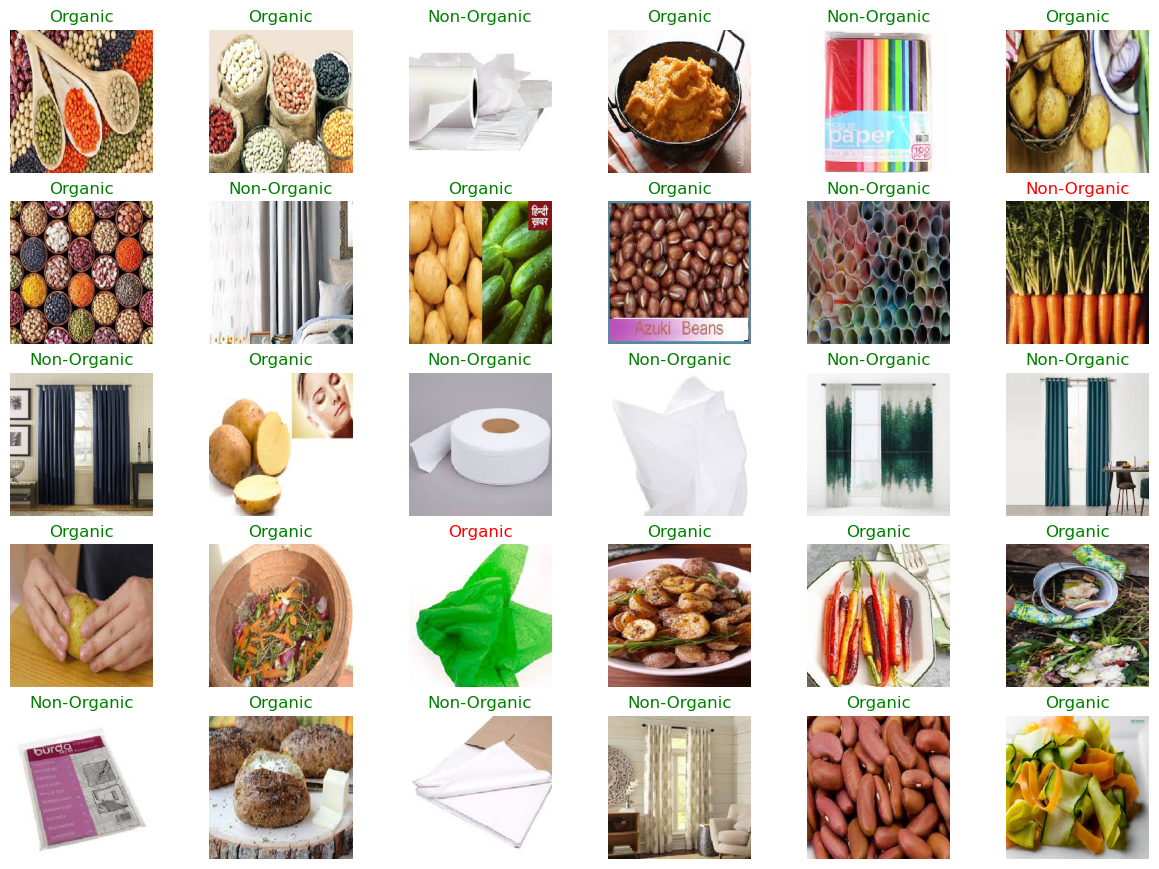

In [13]:
# Visualizing the model's predictions on a batch of validation images
# The figure size is set to (15, 13) and 30 images are plotted in a grid layout
# The model's prediction for each image is obtained using model.predict, and the true label of the image is obtained from the validation generator
# The title of each image shows the model's prediction, and is colored green if the prediction is correct, or red if the prediction is incorrect
# The axis of each image is turned off to focus on the image itself

img, _= next(validation_gen)
plt.figure(figsize=(15, 13))
result = model.predict(img)
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    if result[i][1] < 0.5:
        pred = 0
        if pred == _[i][1]:
            plt.title("Organic", color='green')
        else: 
            plt.title("Organic", color='red')
    else:
        pred = 1
        if pred == _[i][1]:
            plt.title("Non-Organic", color='green')
        else: 
            plt.title("Non-Organic", color='red')
    plt.axis("off")